In [1]:
import numpy as np
import pandas as pd
import pyabc
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tempfile

In [121]:
df = pd.read_csv('./data/genres.csv')
df.head()

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [3]:
df.danceability.describe()

count    42305.000000
mean         0.639364
std          0.156617
min          0.065100
25%          0.524000
50%          0.646000
75%          0.766000
max          0.988000
Name: danceability, dtype: float64

<AxesSubplot:xlabel='danceability', ylabel='count'>

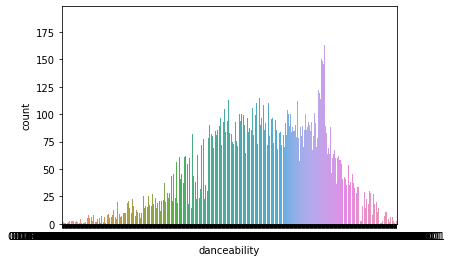

In [4]:
sns.countplot(x="danceability", data=df)

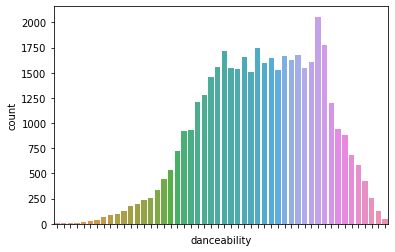

In [148]:
danceablity = pd.cut(df.danceability, bins=50)
danceablity_data = [(d.left + d.right)/2 for d in danceablity]
danceablity_count_d = {}
for d in danceablity_data:
    danceablity_count_d[d]= danceablity_count_d.get(d, 0 ) + 1
danceablity_count_l = np.array([danceablity_count_d[d] for d in sorted(list(danceablity_count_d.keys()))])
d_p = sns.countplot(x=danceablity)
d_p.set(xticklabels=[])
plt.show()

In [156]:
def gaussian_model(parameters):
    y = st.norm(loc=parameters['mu'], scale=parameters['sigma']).rvs()
    return {"danceablity": y}

In [95]:
def distance(x, y):
    return np.mean(abs(x["danceablity"] - y["danceablity"]))

In [152]:
mu_x = df.danceability.describe()['mean']
sigma = 0.5
parameter_priors = [
    pyabc.Distribution(
        mu=pyabc.RV("uniform", mu_x - 0.5, mu_x + 0.5),
        sigma=pyabc.RV("uniform", 0 , 1),
                      )
]

In [153]:
abc = pyabc.ABCSMC(gaussian_model, parameter_priors, distance)

INFO:Sampler:Parallelizing the sampling on 4 cores.


In [154]:
db_path = ("sqlite:///" +
           os.path.join(tempfile.gettempdir(), "tutorial.db"))
abc.new(db_path, {"danceablity": danceablity_data});

INFO:History:Start <ABCSMC(id=23, start_time=2021-01-05 18:12:51.364541, end_time=None)>


In [157]:
history = abc.run(minimum_epsilon=0.14, max_nr_populations=10)

INFO:Epsilon:initial epsilon is 0.3798360981642878
INFO:ABC:t: 9, eps: 0.3798360981642878.
INFO:ABC:Acceptance rate: 100 / 171 = 5.8480e-01, ESS=3.7653e+01.
INFO:ABC:t: 10, eps: 0.19497521958141653.
INFO:ABC:Acceptance rate: 100 / 386 = 2.5907e-01, ESS=8.6312e+01.
INFO:ABC:t: 11, eps: 0.14292840122331693.
INFO:ABC:Acceptance rate: 100 / 741 = 1.3495e-01, ESS=7.3730e+01.
INFO:ABC:t: 12, eps: 0.13314790239948365.
INFO:ABC:Acceptance rate: 100 / 1382 = 7.2359e-02, ESS=6.9904e+01.
INFO:ABC:Stopping: minimum epsilon.
INFO:History:Done <ABCSMC(id=23, start_time=2021-01-05 18:12:51.364541, end_time=2021-01-05 18:18:12.754955)>


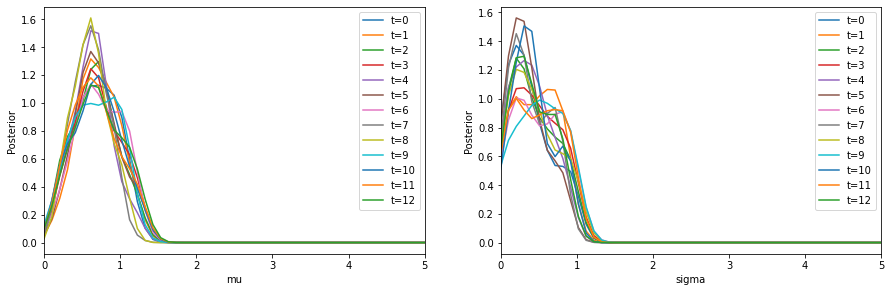

In [158]:
fig = plt.figure(figsize=(15, 10))
ax_mu = fig.add_subplot(221)
for t in range(history.max_t+1):
    df_h, w = history.get_distribution(m=0, t=t)
    pyabc.visualization.plot_kde_1d(
        df_h, w,
        xmin=0, xmax=5,
        x="mu", ax=ax_mu,
        label="t={}".format(t))
ax_mu.legend();
ax_sigma = fig.add_subplot(222)
for t in range(history.max_t+1):
    df_h, w = history.get_distribution(m=0, t=t)
    pyabc.visualization.plot_kde_1d(
        df_h, w,
        xmin=0, xmax=5,
        x="sigma", ax=ax_sigma,
        label="t={}".format(t))
ax_sigma.legend();

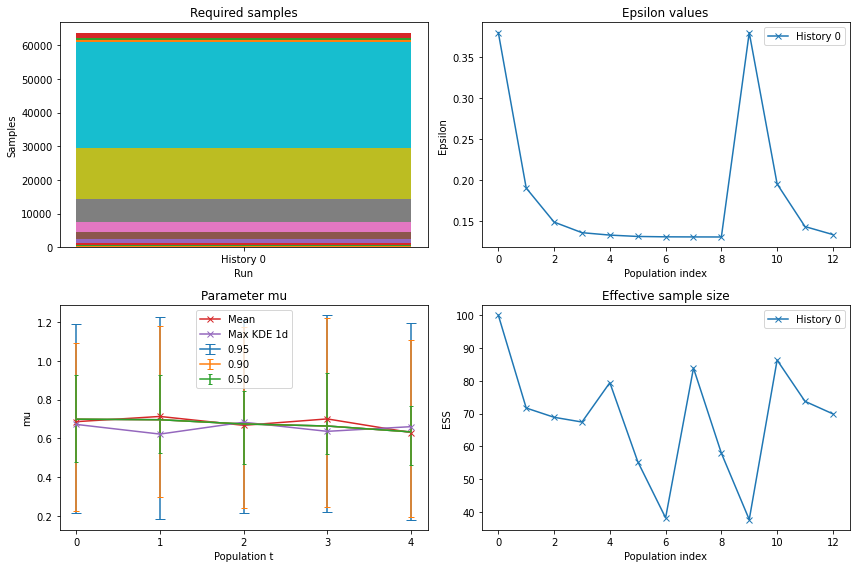

In [159]:
_, arr_ax = plt.subplots(2, 2)

pyabc.visualization.plot_sample_numbers(history, ax=arr_ax[0][0])
pyabc.visualization.plot_epsilons(history, ax=arr_ax[0][1])
pyabc.visualization.plot_credible_intervals(
    history, levels=[0.95, 0.9, 0.5], ts=[0, 1, 2, 3, 4],
    show_mean=True, show_kde_max_1d=True, arr_ax=arr_ax[1][0])
pyabc.visualization.plot_effective_sample_sizes(history, ax=arr_ax[1][1])

plt.gcf().set_size_inches((12, 8))
plt.gcf().tight_layout()

In [161]:
mu = float(history.get_distribution()[0].tail(1).mu)
sigma = float(history.get_distribution()[0].tail(1).sigma)
print(
    f'''
    mu: \t{mu}
    sigma: \t{sigma}
    '''
)


    mu: 	0.5749578009545133
    sigma: 	0.6558491645948206
    


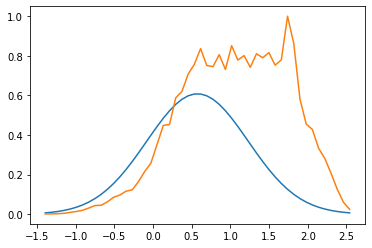

In [164]:
x = np.linspace(mu - 3*sigma, mu + 3*sigma, len(danceablity_count_l))
plt.plot(x, st.norm.pdf(x, mu, sigma))
plt.plot(x, danceablity_count_l/danceablity_count_l.max())
plt.show()

In [128]:
np.linspace(0, 1, 4)

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [130]:
danceablity_count_d.values()

dict_values([])

In [147]:
danceablity_count_l

[3,
 3,
 5,
 9,
 19,
 28,
 41,
 64,
 90,
 93,
 128,
 176,
 199,
 239,
 253,
 338,
 443,
 530,
 726,
 922,
 932,
 1209,
 1275,
 1455,
 1557,
 1720,
 1544,
 1533,
 1657,
 1503,
 1750,
 1601,
 1647,
 1526,
 1666,
 1625,
 1678,
 1548,
 1603,
 2056,
 1774,
 1197,
 937,
 880,
 685,
 579,
 426,
 259,
 124,
 50]